# Amazon Video Project

**In this project, I use supervised learning models to predict whether a movie is going to perform well on Amazon Prime Video platform. **

## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Selection](#Part-4:-Feature-Selection)
</ul>

# Part 0: Setup Google Drive Environment

In [188]:
import pandas as pd
file_id='#'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
my_data = pd.read_csv(csv_url)

In [189]:
my_data.shape

(4226, 16)

In [190]:
my_data.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


**cumulative view time per day is an average value, this is an engagement metric**

In [191]:
print ("Num of rows: " + str(my_data.shape[0])) # row count
print ("Num of columns: " + str(my_data.shape[1])) # col count

Num of rows: 4226
Num of columns: 16


# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [192]:
import warnings
warnings.filterwarnings('ignore')

# imbalanced-learn is a python package offering a number of re-sampling techniques 
# commonly used in datasets showing strong between-class imbalance. 
# It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

import pandas as pd
import numpy as np
import imblearn
# will show all the columns
pd.set_option('display.max_columns', None)
video_df = my_data

In [193]:
video_df.dtypes

video_id                           int64
cvt_per_day                      float64
weighted_categorical_position      int64
weighted_horizontal_poition        int64
import_id                         object
release_year                       int64
genres                            object
imdb_votes                         int64
budget                             int64
boxoffice                          int64
imdb_rating                      float64
duration_in_mins                 float64
metacritic_score                   int64
awards                            object
mpaa                              object
star_category                    float64
dtype: object

In [194]:
print ("Num of rows: " + str(video_df.shape[0])) # row count
print ("Num of columns: " + str(video_df.shape[1])) # col count

Num of rows: 4226
Num of columns: 16


In [195]:
video_df.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


In [196]:
# check duplication

### Part 1.2: Data cleaning

Remove Extra Whitespace

In [197]:
# check categorical feature
video_df['mpaa'][0]

'PG-13'

### Part 1.3:  Understand the features

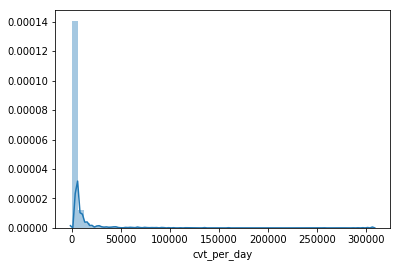

In [198]:
# check the feature distribution
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# sns.distplot: Flexibly plot a univariate distribution of observations. 
# kde: kernel density estimate
sns.distplot(video_df['cvt_per_day'], kde=True) 

In [199]:
video_df.columns

Index(['video_id', 'cvt_per_day', 'weighted_categorical_position',
       'weighted_horizontal_poition', 'import_id', 'release_year', 'genres',
       'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'duration_in_mins',
       'metacritic_score', 'awards', 'mpaa', 'star_category'],
      dtype='object')

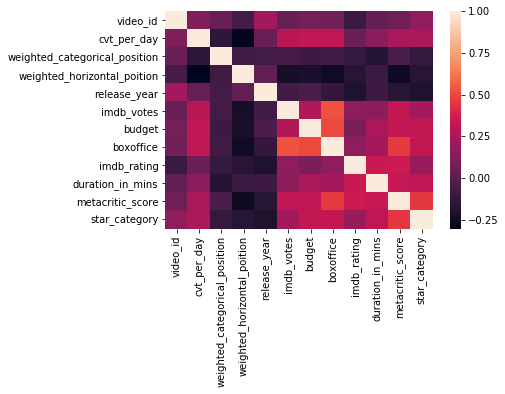

In [200]:
# correlations between all the features
corr = video_df[video_df.columns].corr()

# show heapmap of correlations
sns.heatmap(corr)

In [201]:
# check the actual values of correlations
corr

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
video_id,1.000000,0.122352,0.050145,-0.067163,0.231145,0.047766,0.088285,0.071539,-0.099815,0.023838,0.063930,0.170079
cvt_per_day,0.122352,1.000000,-0.148000,-0.301663,0.045859,0.297697,0.315886,0.312209,0.058894,0.152217,0.249159,0.246956
weighted_categorical_position,0.050145,-0.148000,1.000000,-0.084066,-0.068902,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851
weighted_horizontal_poition,-0.067163,-0.301663,-0.084066,1.000000,0.026634,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801
release_year,0.231145,0.045859,-0.068902,0.026634,1.000000,-0.082661,-0.040121,-0.128091,-0.198856,-0.096811,-0.167038,-0.198454
imdb_votes,0.047766,0.297697,-0.063700,-0.220749,-0.082661,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192
budget,0.088285,0.315886,-0.089899,-0.211356,-0.040121,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721
boxoffice,0.071539,0.312209,-0.073628,-0.244709,-0.128091,0.531467,0.504618,1.000000,0.163673,0.226184,0.464965,0.322329
imdb_rating,-0.099815,0.058894,-0.116443,-0.162021,-0.198856,0.163264,0.105671,0.163673,1.000000,0.344055,0.346935,0.191768
duration_in_mins,0.023838,0.152217,-0.174461,-0.102344,-0.096811,0.155670,0.251342,0.226184,0.344055,1.000000,0.327050,0.309110


In [202]:
# calculate two features pearson coefficient of correlation
# how to interpret: https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/
from scipy.stats import pearsonr
print (pearsonr(video_df['cvt_per_day'], video_df['boxoffice'])[0])
print (pearsonr(video_df['cvt_per_day'], video_df['budget'])[0])

0.31220891751693813
0.31588570143658673


# Part 2: Feature Preprocessing

### Part 2.1 Processing Missing Values

In [203]:
video_df.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


In [204]:
# # visualize the missing values
# import missingno as msno
# msno.matrix(video_df)

In [205]:
video_df.isnull().sum()

video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
import_id                        0
release_year                     0
genres                           0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
awards                           0
mpaa                             0
star_category                    0
dtype: int64

In [206]:
#严谨一点应该drop掉ID和year
video_df.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,280371.162565,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,112640.127822,13036.079964,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,7909.000000,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
25%,285104.250000,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,313891.500000,1193.499989,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,349345.750000,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
max,394880.000000,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


**there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.** 
-  imdb votes
-  budget
-  boxoffice
-  imdb_rating
-  metacritic_score
-  star_category

In [207]:
print((video_df[['imdb_votes','budget','boxoffice','imdb_rating','metacritic_score','star_category']] == 0).sum())

imdb_votes           344
budget              2454
boxoffice           3194
imdb_rating          344
metacritic_score    3012
star_category       1846
dtype: int64


**imdb votes and rating might not be invalid zeros, since many movies are not known by the public, indicating their 'unpopularness'**

In [68]:
invalid_zeros = ['budget','boxoffice','metacritic_score','star_category','imdb_rating','imdb_votes']

In [69]:
# mark zero values as missing or NaN
video_df[invalid_zeros]= video_df[invalid_zeros].replace(0, np.NaN)
# count the number of NaN values in each column
print(video_df.isnull().sum())

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                          0
budget                           2454
boxoffice                        3194
imdb_rating                         0
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64


***Based on my understanding:***
-  **uninformative missing: budget, boxoffice,metacritic_score,star_category**
-  **infrmative missing: imdb_votes,imdb_rating**

In [74]:
# Solution: 
# drop metacritic_score column
original = video_df
video_df = video_df.drop('metacritic_score',axis = 1)
video_df.columns

Index(['video_id', 'cvt_per_day', 'weighted_categorical_position',
       'weighted_horizontal_poition', 'import_id', 'release_year', 'genres',
       'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'duration_in_mins',
       'awards', 'mpaa', 'star_category'],
      dtype='object')

In [75]:
# impute with median for budget and boxoffice column
video_df["budget"].fillna(video_df["budget"].median(), inplace=True)
video_df["boxoffice"].fillna(video_df["boxoffice"].median(), inplace=True)

In [80]:
video_df.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,2380.000000
mean,280371.162565,4218.630239,7.782537,28.103644,2001.056791,6462.924042,3.021780e+06,8.999335e+06,5.257099,89.556123,1.695107
std,112640.127822,13036.079964,6.134183,11.863649,17.496849,31596.006790,6.950107e+06,6.975854e+06,2.122810,21.086183,0.603482
min,7909.000000,2.187625,1.000000,1.000000,1916.000000,0.000000,1.000000e+00,1.316000e+03,0.000000,4.037250,1.000000
25%,285104.250000,351.168776,4.000000,20.000000,1998.000000,81.000000,1.500000e+06,8.551228e+06,4.300000,82.601712,1.112778
50%,313891.500000,1193.499989,6.000000,28.000000,2008.000000,535.000000,1.500000e+06,8.551228e+06,5.800000,90.730308,1.666667
75%,349345.750000,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,8.551228e+06,6.800000,99.500312,2.018750
max,394880.000000,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,4.000000


In [83]:
video_df["star_category"].fillna(video_df["star_category"].median(), inplace=True)

In [84]:
# double check there's no untreated null value
print(video_df.isnull().sum())

video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
import_id                        0
release_year                     0
genres                           0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
awards                           0
mpaa                             0
star_category                    0
dtype: int64


### Part 2.2 Catagorical Feature -- Genre

In [85]:
# make a copy of the curret state of video_df data
video_before_genre = video_df

In [ ]:
# catagorical feature

In [86]:
video_df.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000.0,42930462.0,6.5,112.301017,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000.0,3301046.0,6.5,94.983250,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000.0,37397291.0,7.3,115.763675,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000.0,15700000.0,7.6,130.703583,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000.0,8551228.0,6.4,105.545533,other award,R,3.066667


In [101]:
genre_set = set()
for i,row in video_df.iterrows():
    this_row = row['genres'].split(',')
    for elem in this_row:
        if elem not in genre_set:
            genre_set.add(elem)



In [103]:
len(genre_set)

27

In [110]:
cleaned = video_df.set_index('video_id').genres.str.split(',', expand=True).stack()
cleaned.head()

video_id   
385504    0      Action
          1    Thriller
          2       Drama
300175    0      Comedy
          1       Crime
dtype: object

In [114]:
genres_subset = pd.get_dummies(cleaned, prefix='g').groupby(level=0).sum().reset_index()
genres_subset.head()

,video_id,g_Action,g_Adult,g_Adventure,g_Animation,g_Anime,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Fantasy,g_Foreign/International,g_Holiday,g_Horror,g_Independent,g_Kids & Family,g_LGBT,g_Lifestyle,g_Music,g_Musicals,g_Mystery,g_Reality,g_Romance,g_Sci-Fi,g_Sport,g_Thriller,g_War,g_Western
0,7909,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,7910,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,7911,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,7942,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7943,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
video_updated = pd.merge(video_df,genres_subset,on='video_id')
video_updated.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,awards,mpaa,star_category,g_Action,g_Adult,g_Adventure,g_Animation,g_Anime,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Fantasy,g_Foreign/International,g_Holiday,g_Horror,g_Independent,g_Kids & Family,g_LGBT,g_Lifestyle,g_Music,g_Musicals,g_Mystery,g_Reality,g_Romance,g_Sci-Fi,g_Sport,g_Thriller,g_War,g_Western
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000.0,42930462.0,6.5,112.301017,other award,PG-13,1.710000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000.0,3301046.0,6.5,94.983250,no award,R,3.250000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000.0,37397291.0,7.3,115.763675,other award,R,2.646667,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000.0,15700000.0,7.6,130.703583,Oscar,R,1.666667,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000.0,8551228.0,6.4,105.545533,other award,R,3.066667,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [119]:
video_updated.shape

(4226, 42)

### Part2.3 Catagorical feature --- mpaa

In [122]:
video_updated['mpaa'].unique()

array(['PG-13', 'R', 'PG', 'NC-17', 'NotRated', 'G'], dtype=object)

In [123]:
#make a copy again
video_before_mpaa = video_updated

In [124]:
# recode answers on a 1,2,3,4,5,6,scale
video_updated = video_updated.replace({'G':1, 
                                       'PG':2, 
                                       'PG-13':3,
                                       'R':4, 
                                       'NC-17':5,
                                       'NotRated':0})

In [125]:
video_updated.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,awards,mpaa,star_category,g_Action,g_Adult,g_Adventure,g_Animation,g_Anime,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Fantasy,g_Foreign/International,g_Holiday,g_Horror,g_Independent,g_Kids & Family,g_LGBT,g_Lifestyle,g_Music,g_Musicals,g_Mystery,g_Reality,g_Romance,g_Sci-Fi,g_Sport,g_Thriller,g_War,g_Western
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000.0,42930462.0,6.5,112.301017,other award,3,1.710000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000.0,3301046.0,6.5,94.983250,no award,4,3.250000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000.0,37397291.0,7.3,115.763675,other award,4,2.646667,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000.0,15700000.0,7.6,130.703583,Oscar,4,1.666667,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000.0,8551228.0,6.4,105.545533,other award,4,3.066667,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


### Part2.4 Datetime: release year

In [127]:
import datetime

In [128]:
video_updated['release_year'] = pd.to_datetime(video_updated['release_year'],format = '%Y')

In [129]:
video_updated.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,awards,mpaa,star_category,g_Action,g_Adult,g_Adventure,g_Animation,g_Anime,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Fantasy,g_Foreign/International,g_Holiday,g_Horror,g_Independent,g_Kids & Family,g_LGBT,g_Lifestyle,g_Music,g_Musicals,g_Mystery,g_Reality,g_Romance,g_Sci-Fi,g_Sport,g_Thriller,g_War,g_Western
0,385504,307127.605608,1,3,lionsgate,2013-01-01,"Action,Thriller,Drama",69614,15000000.0,42930462.0,6.5,112.301017,other award,3,1.710000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426375,1,3,lionsgate,2013-01-01,"Comedy,Crime,Thriller",46705,15000000.0,3301046.0,6.5,94.983250,no award,4,3.250000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867446,1,3,other,2012-01-01,"Crime,Drama",197596,26000000.0,37397291.0,7.3,115.763675,other award,4,2.646667,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,308314,196622.720996,3,4,lionsgate,2008-01-01,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000.0,15700000.0,7.6,130.703583,Oscar,4,1.666667,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,307201,159841.652064,1,3,lionsgate,2013-01-01,"Crime,Thriller,Mystery,Documentary",46720,27220000.0,8551228.0,6.4,105.545533,other award,4,3.066667,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding)

In [139]:
video_updated1 = pd.get_dummies(video_updated, columns=['import_id'])

In [140]:
video_updated2 = pd.get_dummies(video_updated1, columns=['awards'])

In [143]:
video_updated2.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,mpaa,star_category,g_Action,g_Adult,g_Adventure,g_Animation,g_Anime,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Fantasy,g_Foreign/International,g_Holiday,g_Horror,g_Independent,g_Kids & Family,g_LGBT,g_Lifestyle,g_Music,g_Musicals,g_Mystery,g_Reality,g_Romance,g_Sci-Fi,g_Sport,g_Thriller,g_War,g_Western,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award
0,385504,307127.605608,1,3,2013-01-01,"Action,Thriller,Drama",69614,15000000.0,42930462.0,6.5,112.301017,3,1.710000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,300175,270338.426375,1,3,2013-01-01,"Comedy,Crime,Thriller",46705,15000000.0,3301046.0,6.5,94.983250,4,3.250000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,361899,256165.867446,1,3,2012-01-01,"Crime,Drama",197596,26000000.0,37397291.0,7.3,115.763675,4,2.646667,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,308314,196622.720996,3,4,2008-01-01,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000.0,15700000.0,7.6,130.703583,4,1.666667,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,307201,159841.652064,1,3,2013-01-01,"Crime,Thriller,Mystery,Documentary",46720,27220000.0,8551228.0,6.4,105.545533,4,3.066667,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [144]:

to_drop= ['cvt_per_day','genres']
video_updated2= video_updated2.drop(to_drop, axis=1)
video_updated2.head()

,video_id,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,mpaa,star_category,g_Action,g_Adult,g_Adventure,g_Animation,g_Anime,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Fantasy,g_Foreign/International,g_Holiday,g_Horror,g_Independent,g_Kids & Family,g_LGBT,g_Lifestyle,g_Music,g_Musicals,g_Mystery,g_Reality,g_Romance,g_Sci-Fi,g_Sport,g_Thriller,g_War,g_Western,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award
0,385504,1,3,2013-01-01,69614,15000000.0,42930462.0,6.5,112.301017,3,1.710000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,300175,1,3,2013-01-01,46705,15000000.0,3301046.0,6.5,94.983250,4,3.250000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,361899,1,3,2012-01-01,197596,26000000.0,37397291.0,7.3,115.763675,4,2.646667,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,308314,3,4,2008-01-01,356339,15000000.0,15700000.0,7.6,130.703583,4,1.666667,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,307201,1,3,2013-01-01,46720,27220000.0,8551228.0,6.4,105.545533,4,3.066667,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [145]:
X = video_updated2

In [149]:
X['release_year'] = video_df['release_year']

In [151]:
y = video_df['cvt_per_day']

In [152]:
# Scale the data, using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))
print (pd.DataFrame(X).head())

Feature space holds 4226 observations and 47 features
Unique target labels: [2.18762475e+00 2.86661397e+00 2.93569112e+00 ... 2.56165867e+05
 2.70338426e+05 3.07127606e+05]
         0         1         2         3          4         5         6   \
0  0.933462 -1.105826 -2.116264  0.682673   1.998941  1.723662  4.864658   
1  0.175836 -1.105826 -2.116264  0.682673   1.273795  1.723662 -0.816956   
2  0.723876 -1.105826 -2.116264  0.625513   6.049995  3.306559  4.071375   
3  0.248101 -0.779746 -2.031963  0.396873  11.074737  1.723662  0.960665   
4  0.238219 -1.105826 -2.116264  0.682673   1.274270  3.482116 -0.064244   

         7         8         9         10        11        12        13  \
0  0.585567  1.078791  0.790878  0.060300  2.145923 -0.026653 -0.306543   
1  0.585567  0.257409  1.356690  3.459786 -0.458520 -0.026653 -0.306543   
2  0.962471  1.243025  1.356690  2.127953 -0.458520 -0.026653 -0.306543   
3  1.103810  1.951625  1.356690 -0.035357  2.145923 -0.026653 -0.30654

In [153]:
X

array([[ 0.933462  , -1.10582603, -2.11626404, ..., -0.18578623,
        -1.24514749,  1.38147213],
       [ 0.17583592, -1.10582603, -2.11626404, ..., -0.18578623,
         0.80311771, -0.72386549],
       [ 0.723876  , -1.10582603, -2.11626404, ..., -0.18578623,
        -1.24514749,  1.38147213],
       ...,
       [-2.38625409, -0.77974566, -0.09303838, ..., -0.18578623,
        -1.24514749,  1.38147213],
       [-2.25529059, -0.61670548, -1.10465121, ..., -0.18578623,
         0.80311771, -0.72386549],
       [-2.38968134, -0.12758492,  0.58137018, ..., -0.18578623,
         0.80311771, -0.72386549]])

# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [154]:
# Split data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 3380 observation with 47 features
test data has 846 observation with 47 features


### Part 3.2: Model Training and Selection

In [159]:
#@title build models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.linear_model import LogisticRegression

# Linear Regression
lm = LinearRegression() 

# # K Nearest Neighbors
# classifier_KNN = KNeighborsClassifier()

# # Random Forest
# classifier_RF = RandomForestClassifier()

In [182]:
# Train the model
lm.fit(X_train, y_train)
# classifier_logistic.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
linear_model.coef_

array([ 4.21196471e+02, -1.28950069e+03, -3.02086328e+03,  7.57617508e+02,
        2.03668726e+03,  1.96450458e+03,  3.89829768e+02, -4.90119032e+02,
        3.26610777e+02,  4.63561212e+02,  1.11259243e+03,  5.12401661e+02,
       -4.39087115e+01, -1.56371643e+02, -1.28095681e+02, -1.05144982e+02,
        5.68497745e+02,  4.70296249e+02, -2.22100765e+02, -1.83680813e+02,
        2.57562204e+02, -2.83224768e+02,  1.00929155e+07,  2.90660503e+02,
        2.84252618e+01,  4.30443290e+02,  6.76854237e+01, -1.10066734e+02,
        1.64871819e+02,  2.33621776e+02, -1.35609266e+02, -1.44615224e+02,
       -2.00176198e+02, -6.60378188e+01,  4.39337004e+01,  9.92587856e+02,
        4.15314492e+02,  3.71834193e+02,  1.12769940e+16,  9.43690011e+15,
        1.40738693e+16,  5.52143038e+15,  9.71609948e+14,  1.47416891e+15,
        2.60816152e+15,  7.09042394e+15,  6.89821360e+15])

In [184]:
# prediction of test data
lm.predict(X_test)

array([ 1.24066971e+04,  5.91869715e+03, -1.63730285e+03, -5.30802851e+02,
        1.33806971e+04,  3.04269715e+03,  1.24119715e+03,  5.16669715e+03,
        9.25619715e+03,  5.69697149e+02,  6.77869715e+03,  7.06669715e+03,
        3.68869715e+03,  3.91969715e+03,  2.21669715e+03,  2.93719715e+03,
       -3.81830285e+03,  1.17169715e+03,  8.46869715e+03,  9.17697149e+02,
        1.31346971e+04, -1.06568029e+04,  4.96219715e+03,  2.44469715e+03,
        6.12519715e+03,  1.22301971e+04,  7.70569715e+03,  1.52611971e+04,
        1.13626971e+04,  1.80419715e+03, -3.15380285e+03, -4.90330285e+03,
        6.45169715e+03,  9.98697149e+02, -9.32802851e+02, -4.56302851e+02,
        5.62069715e+03, -3.73180285e+03,  2.39969715e+03,  1.06196971e+04,
        2.05881971e+04,  3.28019715e+03, -8.78802851e+02, -2.41030285e+03,
        1.97669715e+03, -4.95280285e+03, -1.84330285e+03, -3.65630285e+03,
        3.85069715e+03, -2.62680285e+03, -1.92430285e+03,  5.62269715e+03,
        9.63069715e+03, -

In [185]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,lm.predict(X_test))
mse

508969334482409.25

In [186]:
# Accuracy of test data
lm.score(X_test,y_test)

-6124417.041929917

In [55]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    # cprint(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.866
Model accuracy of KNN is: 0.900
Model accuracy of Random Forest is: 0.950


In [58]:
# Use 10-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    # cprint(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.866
Model accuracy of KNN is: 0.900
Model accuracy of Random Forest is: 0.951


https://scikit-learn.org/stable/modules/model_evaluation.html

#### Homework 2: Can you do prediction with SVM model?

In [32]:
####
## Your Code
####
# SVC
from sklearn.svm import SVC 

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: %.3f'%(cv_score.mean()))


Model accuracy of SVM is: 0.926


### (Optional) Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [33]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [34]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.867
Best parameters set:
	C: 1
	penalty: 'l1'


In [36]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [37]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [38]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.900
Best parameters set:
	n_neighbors: 5


#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [39]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [40]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.958
Best parameters set:
	n_estimators: 80


In [41]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [42]:
# best_RF_model.fit(X_train,y_train)

### Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 
在所有预估的churn user 中，是真的churn user的概率是多少


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.
在所有真的churn user 中，我们判断出真的churn user概率是多少

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.945
precision is: 0.895
recall is: 0.703


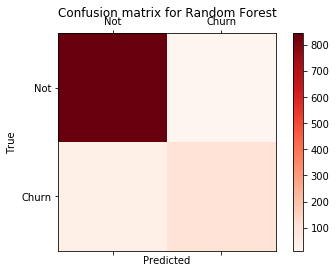

Logistic Regression
Accuracy is: 0.869
precision is: 0.640
recall is: 0.221


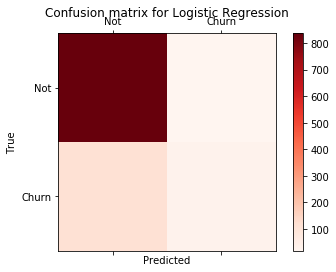

In [44]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

In [45]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

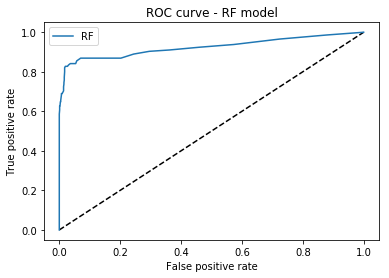

In [46]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [47]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.924573502722323

#### Part 3.4.1: ROC of LR Model

In [48]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

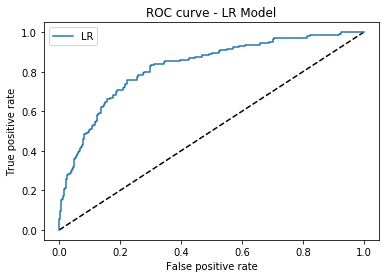

In [49]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [50]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8251260334744908

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

In [51]:
# add L1 regularization to logistic regression
# check the coef for feature selection
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
voice_mail_plan: -0.8657
number_customer_service_calls: 0.673
total_day_charge: 0.6428
intl_plan: 0.613
number_vmail_messages: 0.396
total_eve_minutes: 0.3151
total_intl_calls: -0.1743
total_intl_charge: 0.1381
total_night_charge: 0.1117
total_intl_minutes: 0.1052
total_day_minutes: 0.0916
total_night_minutes: 0.09
account_length: 0.0534
total_day_calls: 0.0495
total_eve_charge: 0.0427
total_night_calls: -0.0288
total_eve_calls: -0.0284


In [52]:
# add L2 regularization to logistic regression
# check the coef for feature selection
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))
  

Logistic Regression (L2) Coefficients
voice_mail_plan: -0.8929
number_customer_service_calls: 0.6731
intl_plan: 0.6132
number_vmail_messages: 0.4234
total_day_minutes: 0.3687
total_day_charge: 0.3664
total_eve_charge: 0.18
total_eve_minutes: 0.1794
total_intl_calls: -0.1761
total_intl_charge: 0.1235
total_intl_minutes: 0.1217
total_night_minutes: 0.1028
total_night_charge: 0.1008
account_length: 0.0552
total_day_calls: 0.0513
total_night_calls: -0.0307
total_eve_calls: -0.0304


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [53]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.1681
total_day_charge: 0.1369
number_customer_service_calls: 0.1071
intl_plan: 0.0888
total_eve_minutes: 0.0716
total_eve_charge: 0.0653
total_intl_calls: 0.047
total_intl_charge: 0.0436
total_night_minutes: 0.0422
total_night_charge: 0.0367
total_intl_minutes: 0.0347
voice_mail_plan: 0.0325
total_day_calls: 0.0277
account_length: 0.0276
number_vmail_messages: 0.0249
total_eve_calls: 0.0233
total_night_calls: 0.0223
